## 6.5 Machine Learning Using K-means Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/niravbariya/Documents/Data Science/CareerFoundry/Data Analytics Immersion/Achievement 6/02 Data'

In [31]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'toronto_cleaned.csv'))

In [32]:
pd.set_option('display.max_columns', None)

In [33]:
df.shape

(15312, 43)

In [34]:
df.head()

,id,scrape_id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,listings_count,listings_count_home,listings_count_p_rooms,listings_count_s_rooms,reviews_per_month
0,26654,20240214201029,113345,2010-04-25,100.000000,41.000000,0,1,Waterfront Communities-The Island,43.64608,-79.39032,Entire condo,Entire home/apt,4,1.0,1.0,2.0,"[""Building staff"", ""Microwave"", ""Central air c...",164.0,28,1125,1,0,0,0,115,2024-02-15,42,2,0,4.790000,4.790000,4.790000,4.640000,4.760000,4.860000,4.670000,f,5,5,0,0,0.260000
1,27423,20240214201029,118124,2010-05-04,100.000000,100.000000,0,1,South Riverdale,43.66884,-79.32725,Entire rental unit,Entire home/apt,1,1.0,0.0,1.0,"[""Free street parking"", ""Microwave"", ""Central ...",75.0,90,365,1,10,13,13,146,2024-02-15,28,1,0,4.930000,5.000000,4.850000,5.000000,5.000000,4.850000,4.850000,f,1,1,0,0,0.170000
2,335446,20240214201029,1704172,2012-02-05,100.000000,100.000000,1,1,Moss Park,43.65744,-79.37228,Private room in condo,Private room,1,1.0,1.0,1.0,"[""Microwave"", ""Central air conditioning"", ""Fre...",100.0,28,1125,1,0,0,2,277,2024-02-15,121,1,0,4.850000,4.720000,4.700000,4.970000,4.960000,4.530000,4.780000,t,2,1,1,0,0.830000
3,339418,20240214201029,1027776,2011-08-27,95.848253,85.081771,0,1,Mount Pleasant West,43.69954,-79.39330,Private room in rental unit,Private room,2,1.0,1.0,0.0,"[""Free street parking"", ""Microwave"", ""Shared s...",60.0,28,90,1,0,0,0,0,2024-02-15,85,0,0,4.500000,4.330000,4.110000,4.590000,4.670000,4.650000,4.360000,f,1,0,1,0,0.580000
4,42892,20240214201029,187320,2010-08-01,100.000000,44.000000,1,1,Waterfront Communities-The Island,43.64450,-79.38019,Entire condo,Entire home/apt,4,2.0,3.0,3.0,"[""Lake access"", ""Long term stays allowed"", ""Ho...",140.0,30,365,1,29,59,89,364,2024-02-15,0,0,0,4.788366,4.810071,4.810071,4.855948,4.867068,4.832452,4.688679,f,12,7,5,0,1.509953


In [35]:
df.columns

Index(['id', 'scrape_id', 'host_id', 'host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'listings_count',
       'listings_count_home', 'listings_count_p_rooms',
       'listings_count_s_rooms', 'reviews_per_month'],
      dtype='object')

In [36]:
# Removing extreme prices
df = df.loc[df['price'] <= 1500]

In [37]:
# Creating a sub set of numerical columns
sub = df[['price','availability_30',
       'availability_60', 'availability_90','number_of_reviews','listings_count',
       'review_scores_rating','reviews_per_month']]

In [38]:
sub.head()

,price,availability_30,availability_60,availability_90,number_of_reviews,listings_count,review_scores_rating,reviews_per_month
0,164.0,0,0,0,42,5,4.790000,0.260000
1,75.0,10,13,13,28,1,4.930000,0.170000
2,100.0,0,0,2,121,2,4.850000,0.830000
3,60.0,0,0,0,85,1,4.500000,0.580000
4,140.0,29,59,89,0,12,4.788366,1.509953


### 2. The elbow technique

In [39]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [40]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-372229078.6012824,
 -200767681.85387868,
 -142816138.44249246,
 -115745307.30327666,
 -86087635.56730613,
 -72944761.79790652,
 -62195527.46298372,
 -63632781.979359016,
 -50881080.611178696]

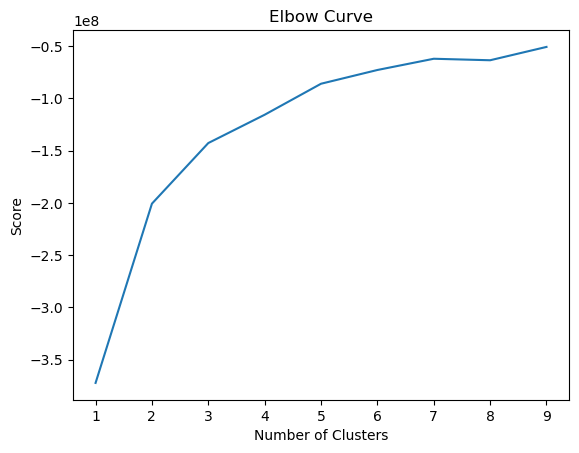

In [41]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this case we see that there the curve starts to flatten out at around 3 to 4 clusters. The graph shows a jump from 5 to 6 clusters but this will effect the interpretability of clusters if we select more clusters. I selected 4 clusters for the reason that the difference after 4 clusters isn't significant and justified to add more complexity in the interpretation.

### 3. k-means clustering

In [42]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [43]:
# Fit the k-means object to the data.

kmeans.fit(sub)

KMeans(n_clusters=4)

In [44]:
sub['clusters'] = kmeans.fit_predict(sub)

/var/folders/xd/gd6kszh506xbhlz9mv23vpxh0000gn/T/ipykernel_83257/3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [45]:
sub.head()

,price,availability_30,availability_60,availability_90,number_of_reviews,listings_count,review_scores_rating,reviews_per_month,clusters
0,164.0,0,0,0,42,5,4.790000,0.260000,0
1,75.0,10,13,13,28,1,4.930000,0.170000,3
2,100.0,0,0,2,121,2,4.850000,0.830000,3
3,60.0,0,0,0,85,1,4.500000,0.580000,3
4,140.0,29,59,89,0,12,4.788366,1.509953,3


In [46]:
sub['clusters'].value_counts()

clusters
3    9266
0    4662
2    1110
1     197
Name: count, dtype: int64

#### Listings count and price

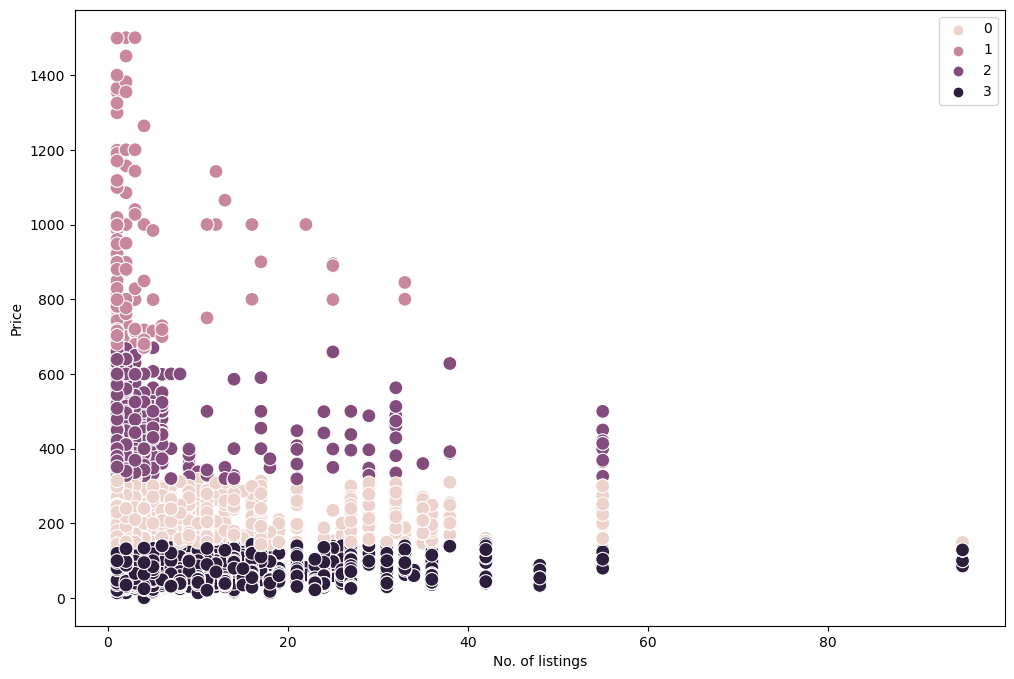

In [47]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['listings_count'], y=sub['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('No. of listings') 
plt.ylabel('Price') 
plt.show()

We see that number of listings decreases as the price of listings increases. Maximum number of listings are found where the prices are relatively low.

#### Price and Review Scores Rating

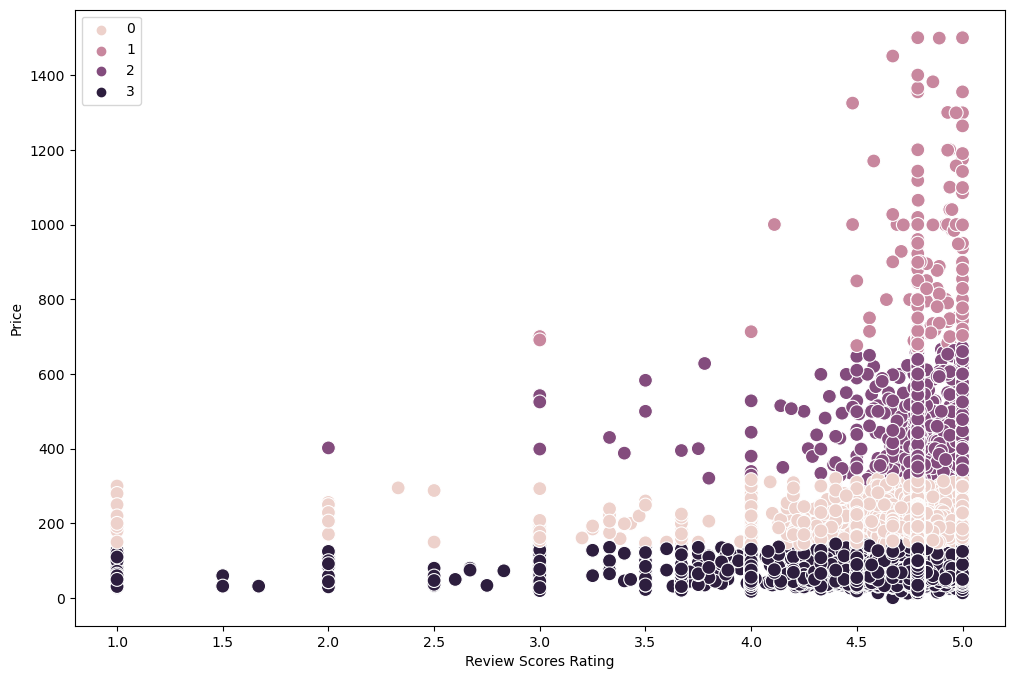

In [48]:
# Plot the clusters for the 'price' and 'review_scores_rating' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['review_scores_rating'], y=sub['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Review Scores Rating') 
plt.ylabel('Price') 
plt.show()

It can be seen that most of the listings have got higher reviews and for the listings that are priced more than $400 have not received very low reviews. And, very highly priced listings have received only high reviews. This may indicate that these listings might offer high standard living experience and therefore the reviews are high.

#### Number of Reviews and Listings Count

Text(0, 0.5, 'Listings Count')

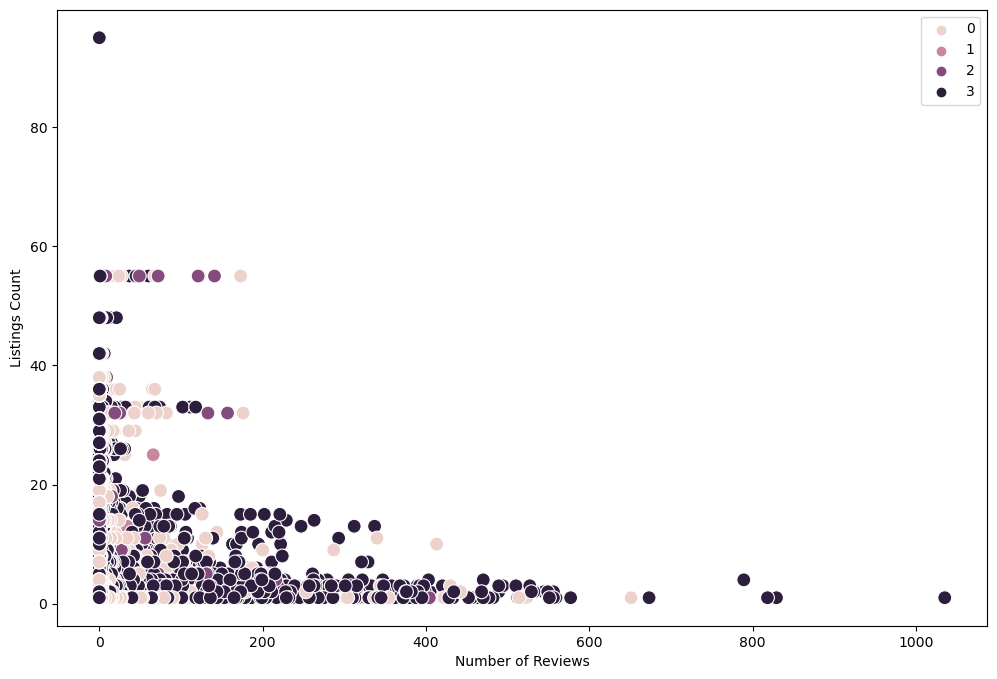

In [49]:
plt.figure(figsize= (12,8))
ax = sns.scatterplot(data = sub, x = 'number_of_reviews', y = 'listings_count', hue=kmeans.labels_,s=100)
plt.xlabel('Number of Reviews')
plt.ylabel('Listings Count')

This cluster is difficult interepret as there is a lot of overlapping.

#### Availability 30 and Price

Text(0, 0.5, 'Price')

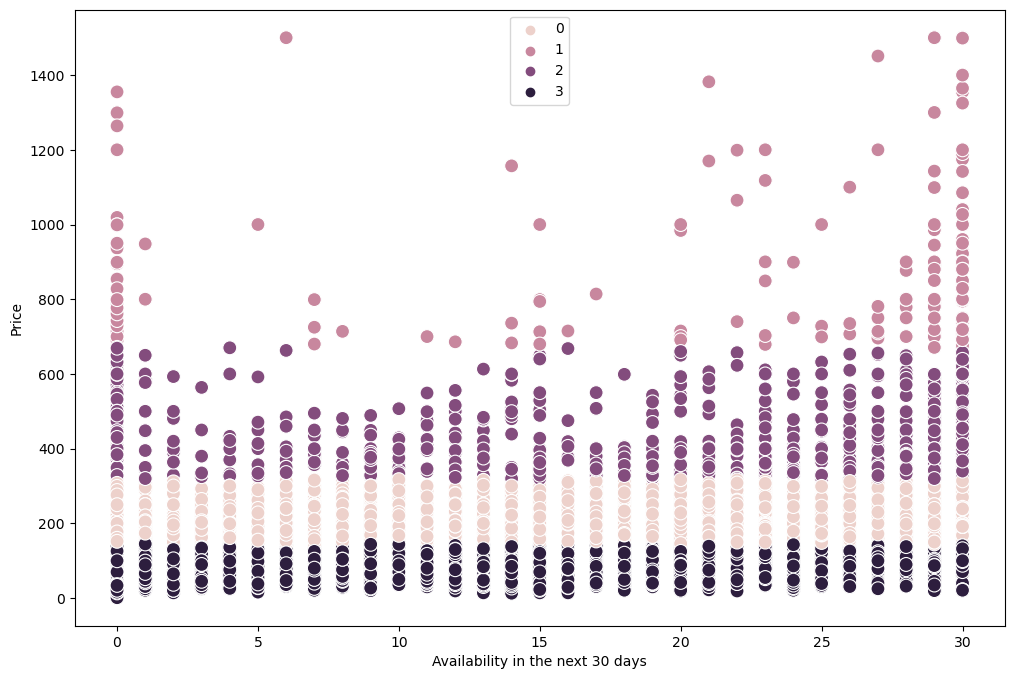

In [50]:
plt.figure(figsize= (12,8))
ax = sns.scatterplot(data = sub, x = 'availability_30', y = 'price', hue=kmeans.labels_,s=100)
plt.xlabel('Availability in the next 30 days')
plt.ylabel('Price')

Low or medium-low priced listings are have varying availability in the next 30 days. The highly priced listings are more split towards 0 and 30 with few listings between 0 and 30. Some of the highly priced listings are occupied regularly, while majority are not at all occupied in the next 30 days.

Text(0, 0.5, 'Price')

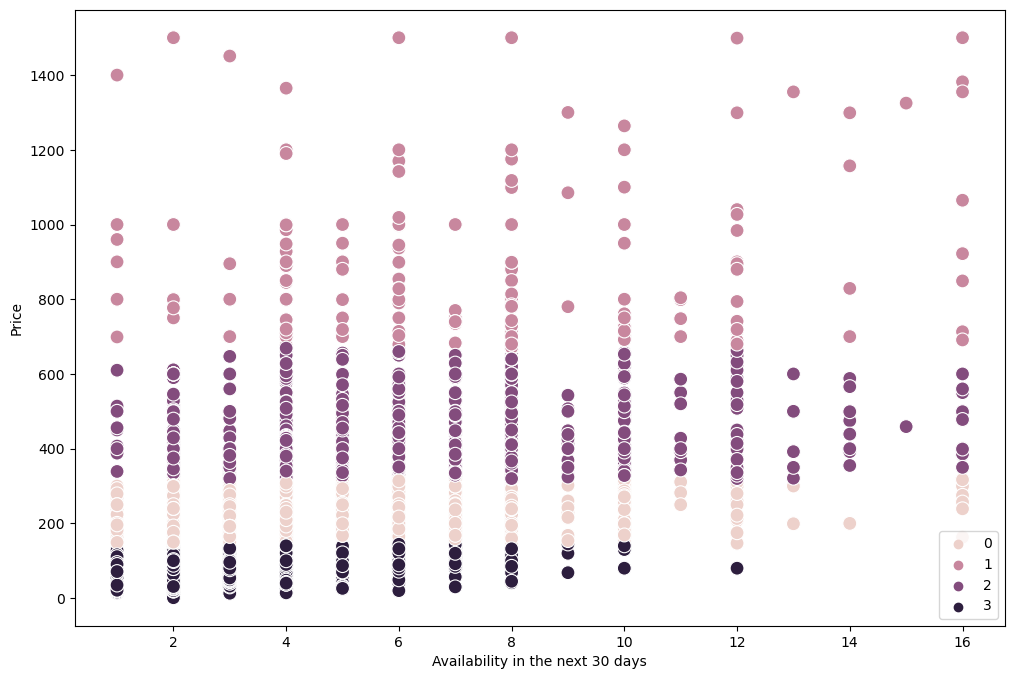

In [51]:
plt.figure(figsize= (12,8))
ax = sns.scatterplot(data = df, x = 'accommodates', y = 'price', hue=kmeans.labels_,s=100)
plt.xlabel('Availability in the next 30 days')
plt.ylabel('Price')

In [52]:
# Adding clusters to original data frame
df['clusters'] = sub['clusters']

In [53]:
df.loc[df['clusters'] == 3, 'cluster'] = 'black'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'

In [54]:
# Groupby clusters and looking at aggregations on various variables
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'availability_30':['mean', 'median'], 
                         'review_scores_rating':['mean', 'median'],
                          'listings_count':['mean', 'median'],
                          'reviews_per_month':['mean','median'],
                          'accommodates':['mean','median']})

price        availability_30        review_scores_rating  \
                  mean median            mean median                 mean   
cluster                                                                     
black        84.367365   83.0       15.194259   15.0             4.773368   
light pink  206.719005  199.0       16.886100   19.0             4.804629   
pink        911.380711  850.0       21.126904   28.0             4.844807   
purple      431.523423  400.0       19.054054   24.0             4.839400   

                     listings_count        reviews_per_month            \
              median           mean median              mean    median   
cluster                                                                  
black       4.788366       5.928340    2.0          1.424211  1.420000   
light pink  4.830000       4.029387    1.0          1.700964  1.509953   
pink        4.860000       3.248731    1.0          1.145467  1.150000   
purple      4.870000       3.253153    1.0          1.522168  1.509953   

           accommodates         
                   mean median  
cluster                         
black          2.357867    2.0  
light pink     4.010940    4.0  
pink           7.086294    7.0  
purple         5.935135    6.0

#### Observations:
1. We see that there is a clear segmentation in terms of price. We can use clusters to classify prices in to low-priced, medium-low priced, medium-high priced, and high priced listings.
2. The availability in the next 30 days for the 4 clusters is quite different too. We see that low and medium-low priced clusters have similar mean availability, but for medium-high and high priced listings have more availability in the next 30 days. This is also related to affordibility of listings.
3. There isn't a clear difference in review_scores_rating between the four clusters indicating that most listings have recieved positive reviews.
4. Note that for low priced and medium-low priced listings the number of listings are high. On the other hand, highly priced and medium-high priced listings have low number of listings counts.
5. Reviews per month is low for highly priced listings in comparison to listings in other clusters.
6. Medium-high and high priced listings accommodates more people on average as expected. On the other hand low priced listings accoommodates only 2 people.


#### Future steps:
1. Looking at the availability in the next 30 days and clusters, it is reasonable to expect that given a price of a listings we might be able to predict how many days in the next 30 days will it be available and consequently we might calculate revenue generated by a listing.
2. We can also use accommodation to predict the price of the listings. There isn't a strong functional linear relationship between the two variables. But looking at the clusters we can safely classify prices based on the number of people that can be accommodated in a listing.

## Exporting Files

In [109]:
df.to_csv(os.path.join(path, 'Prepared Data', 'toronto_clustered.csv'))